In [0]:
# Import libraries

import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import math
import queue as Q
from matplotlib.colors import ListedColormap
import time
import pprint as pp
import pandas as pd
from operator import itemgetter

In [0]:
# Function to generate a maze with given dimension and p as the probability of cell being blocked.

def generate_maze(dim = 10, p = 0.4):
    
    rows = dim
    cols = dim
    mat = np.ones((dim,dim), dtype=int)
    
    for i in range(rows):
        for j in range(cols):
            if( rand.uniform(0,1) < p ):    ##if random number is greater than 0.4, it is occupied
                mat[i][j] = 0
    
    mat[0][0] = 1
    mat[dim-1][dim-1] = 1
    
    return mat 

In [0]:
def check_child_validity(maze,vertex,visited):
    
    dim = maze.shape[0] 

    # If dimensions are in the range
    if vertex[0]==-1 or vertex[1]==-1 or vertex[0]==dim or vertex[1]==dim:
        return False
    # If node is closed
    elif maze[vertex[0],vertex[1]]==0 or vertex in visited:
        return False
    else:
        return True # Valid child

In [0]:
def create_child_nodes(maze,visited,x,y):
  
  children = []
  
  node1 = (x+1,y)
  if(check_child_validity(maze,node1, visited)):
    children.append(node1)
                
  node2 = (x,y+1)
  if(check_child_validity(maze,node2, visited)):
    children.append(node2)

  node3 = (x-1,y)
  if(check_child_validity(maze,node3, visited)):
    children.append(node3)

  node4 = (x,y-1)
  if(check_child_validity(maze,node4, visited)):
    children.append(node4)
  
  return children

In [0]:
def A_star_heuristic(maze, h, goal, heuristic):
    
    dim = maze.shape[0]
    
    for i in range(dim):
        for j in range(dim): 
            if(heuristic == "manhattan"):
                h[i][j] = ( abs(goal[0]-i) + abs(goal[1]-j) )

            if(heuristic == "euclidean"):
                h[i][j] = math.sqrt( (goal[0] - i)**2 + (goal[1]-j)**2 ) 
    

In [0]:
def A_star(maze, start, goal, heuristic):
    
    dim = goal[0] + 1
    h = np.zeros((dim, dim))
    g = np.zeros((dim,dim))
    f = np.zeros((dim,dim))
    
    g[start] = 0
    A_star_heuristic( maze, h, goal, heuristic)
    f = g + h 
    
    visited = []
    prev_list = {} 
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    fringe = Q.PriorityQueue()
    fringe.put((f[start], start))
    
    while not (fringe.empty()):
        

        vertex = fringe.get()[1]
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, fringe.qsize() )
        visited.append(vertex)
        
        if vertex == goal:
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
        
        i = vertex[0]
        j = vertex[1] 

        # Generating and adding child nodes in fringe 
        child = create_child_nodes(maze,visited,i,j)
        if child:
            for c in child:
                prev_list[c] = vertex
                visited.append(c)
                g[c] = g[vertex] + 1
                f[c] = g[c] + h[c]
                fringe.put((f[c], c))
    

    return 0, prev_list, count_of_nodes, max_fringe_size, visited  # No path found

In [0]:
def display_path(maze_temp, prev_list, start, goal):
  
    prev_node = goal
    path = [prev_node]
    maze_temp[prev_node] = 25
    
    # Backtracks from last node using prev_list
    if bool(prev_list):
      while(prev_list[prev_node] != start):
        current_node = prev_node
        prev_node = prev_list[(current_node)]
        path.append(prev_node)
        maze_temp[prev_node] = 50
        
      path.append(prev_list[prev_node])
      path.reverse()
      maze_temp[prev_list[prev_node]] = 25
      
      path_length = len(path)
      
      # Plotting the path in the maze
      plt.figure(figsize=(15,15))
      sns.heatmap(maze_temp, cmap=ListedColormap(['black', 'green', 'crimson', 'papayawhip']), linewidths=.5, square = True, cbar=False, xticklabels=False, yticklabels=False)
      plt.show()
      
      return path_length

In [0]:
def path_length(goal, prev_list, start):
    
    prev_node = goal
    path = [prev_node]
    path_len = 0
    
    # Backtracks from last node using prev_list
    if bool(prev_list):
        while(prev_node in prev_list.keys() and prev_list[prev_node] != start):
            current_node = prev_node
            prev_node = prev_list[(current_node)]
            path.append(prev_node)
        
        path.append(prev_list[prev_node])
        path.reverse()
        path_len = len(path)
    
    return path_len, path

In [0]:
def solve_maze():
  
    path_length = 0
    
    ## LIST of fators ##
    algo_list = [ "A_Mahnattan"]
    factor_list = ["path_length", "time", "nodes_explored", "max_fringe_size"] 
    df = pd.DataFrame(columns= factor_list, index=algo_list)

    maze = generate_maze(dim, p)
  
    ##  A* - MANHATTAN  ##
    print(" \n ---------A* -Manhattan---------")
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "manhattan")
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    df.loc["A_Mahnattan"]["time"] = current_time
    df.loc["A_Mahnattan"]["nodes_explored"] = count_of_nodes
    df.loc["A_Mahnattan"]["path_length"] = path_length
    df.loc["A_Mahnattan"]["max_fringe_size"] = max_fringe_size
  
    
    print(df)


In [0]:
def visualise_maze(maze):
#   plt.figure(figsize=(15,15))
  ax = sns.heatmap(maze, linewidths=.5,square = True, cbar=False, xticklabels=False, yticklabels=False)
  plt.show()

In [0]:
dim = 50
p = 0.2
start = (0,0)
goal = (dim-1,dim-1)

 
 ---------A* -Manhattan---------
Goal Reached


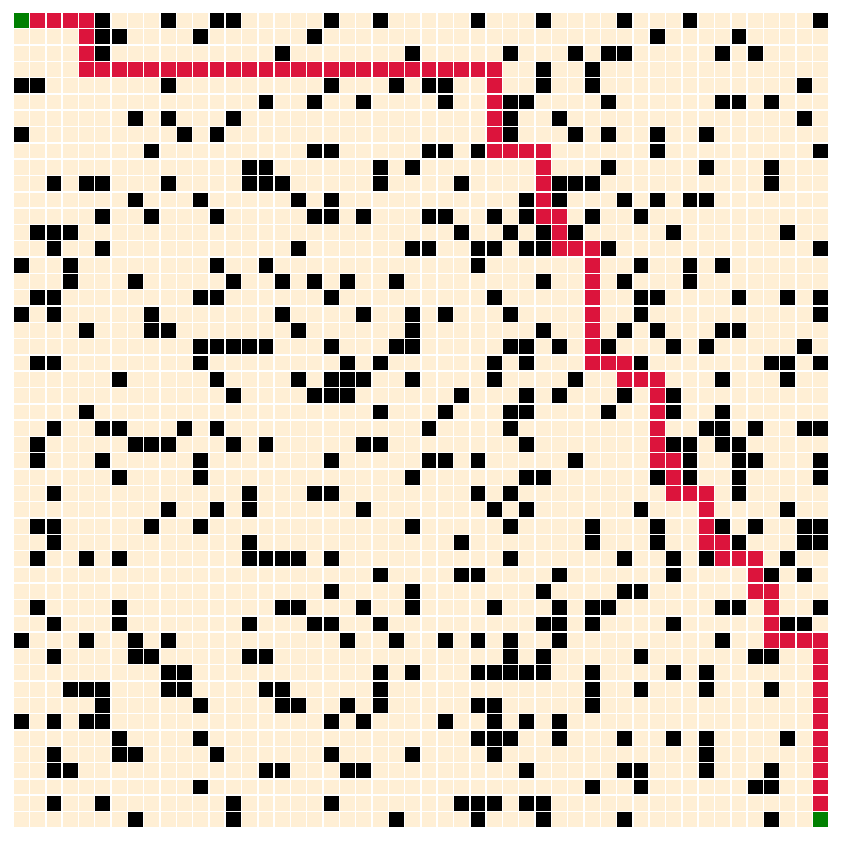

            path_length    time nodes_explored max_fringe_size
A_Mahnattan          99  0.1903           1369             173


In [61]:
solve_maze()

##Genetic Algorithm: 

In [0]:
# Generate initial population:
def generate_initial_population(population_size):
    
    population = []
    for i in range(population_size):
        maze = generate_maze(dim, p)
        population.append(maze)
    return population

In [0]:
def fitting_function(population_maze):
  
      goal = (dim-1, dim-1)
      start = (0,0)
      population_fitness = []
      
      for i in range(len(population_maze)):
        
        maze = population_maze[i]
        is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "manhattan")
        
        if(is_goal_reached):
          
          shortest_path_length, path = path_length(goal, prev_list, start)
          fitness = shortest_path_length   # Here fitting function depends on only one parameter
        else:
          fitness = 0
          
        population_fitness.append((maze,fitness))
      
      return population_fitness 

In [0]:
def single_point_crossover(maze_1, maze_2, alpha):

  dim = maze_1.shape[0]
  child1_maze = np.zeros((dim, dim))
  child2_maze = np.zeros((dim, dim))
  
  break_point = math.ceil(alpha * dim) # To determine the column value for breakpoint
  
  child1_maze[0:dim, 0:break_point] = maze_1[0:dim, 0:break_point]
  child1_maze[0:dim, break_point:dim] = maze_2[0:dim, break_point:dim]
  
  break_point = dim - break_point    #To increase the proportion of the fitter parent
  child2_maze[0:dim, 0:break_point] = maze_2[0:dim, 0:break_point]
  child2_maze[0:dim, break_point:dim] = maze_1[0:dim, break_point:dim]
  
  return child1_maze, child2_maze

In [0]:
def two_point_crossover(maze_1, maze_2, alpha_1, alpha_2):

  dim = maze_1.shape[0]
  child1_maze = np.zeros((dim, dim))
  child2_maze = np.zeros((dim, dim))
  
  break_point_1 = math.ceil(alpha_1 * dim)
  break_point_2 = math.ceil(alpha_2 * dim)
  
  
  child1_maze[0:dim, 0:break_point_1] = maze_1[0:dim, 0:break_point_1]
  child1_maze[0:dim, break_point_1:break_point_2] = maze_2[0:dim, break_point_1:break_point_2]
  child1_maze[0:dim, break_point_2:dim] = maze_1[0:dim, break_point_2:dim]
  
  child2_maze[0:dim, 0:break_point_1] = maze_2[0:dim, 0:break_point_1]
  child2_maze[0:dim, break_point_1:break_point_2] = maze_1[0:dim, break_point_1:break_point_2]
  child2_maze[0:dim, break_point_2:dim] = maze_2[0:dim, break_point_2:dim]
  
  return child1_maze, child2_maze

In [0]:
def uniform_crossover(maze_1,maze_2,alpha):
    
    dim = maze_1.shape[0]
    child1_maze = np.zeros((dim, dim))
    child2_maze = np.zeros((dim, dim))
    
    for i in range(dim):
        ra = rand.random()
        if ra<=alpha :   # This more gives probability to fitter parent
            child1_maze[0:dim,i] = maze_1[0:dim,i]
            child2_maze[0:dim,i] = maze_2[0:dim,i]
        else:
            child1_maze[0:dim,i] = maze_2[0:dim,i]
            child2_maze[0:dim,i] = maze_1[0:dim,i]
    
    return child1_maze, child2_maze

### Select parents based on fitness

In [0]:
def select_parents(population, num_parents):

    sorted(population, key = itemgetter(1))
    n = len(population)
    sum = 1*(1.1**(n)-1)/0.1
    
    cdf = []
    num = 0
    for i in range(n):
        num += 1.1**i
        cdf.append(num/sum)
    
    selected_parents_ind = []
    
    for k in range(num_parents):
        while True:  
            ra = rand.random()
            i = 0
            while(ra>cdf[i]):
                i += 1
            if i not in selected_parents_ind:
                selected_parents_ind.append(i)
                break
    selected_parents_ind.sort()
    
    selected_parents = []
    for i in selected_parents_ind:
      selected_parents.append(population[i])

    return selected_parents

###Pair parents for crossover

In [0]:
def generate_pairs(num_children, selected_parents):

    num_parents = 20
    
    a = []
    
    for i in range(num_parents):
        a.append(0)

    selected_parents = sorted(selected_parents, key = itemgetter(1))
   
    n = len(selected_parents)
    sum = 1*(1.1**(n)-1)/0.1
    
    cdf = []
    num = 0
    for i in range(n):
        num += 1.1**i
        cdf.append(num/sum)
    

    for k in range(num_children):
        ra = rand.random()
        i = 0
        while(ra>cdf[i]):
            i += 1
        a[i] += 1

    parents = []

    for i in range(len(a)):
        while a[i] > 0:
            parents.append(i)
            a[i] -= 1

    pairs = []
    while parents:
        i = parents.pop()
        for iter in range(len(parents)*5):
            j = parents[int(rand.uniform(0,len(parents)))]
            if j != i:
                parents.remove(j)
                break
        if i == j:
          parents.remove(j)
        pairs.append((i,j))
    
    return pairs

In [0]:
def mutate_child(child_list):
    
    cells = child_list[0].size
    mutate_count = math.floor(0.1 * cells)
    for child in child_list:
        counter = 0
        while(counter!=mutate_count):
            i = rand.randint(0,dim-1)
            j = rand.randint(0,dim-1)
            
            # Addition of obstacle
            if(child[i,j] == 1 and (i,j) != (0,0) and (i,j) != (dim-1,dim-1)):
                child[i,j] = 0
                counter = counter + 1
            
            # Deletion of obstacle
            elif(child[i,j] == 0):
                child[i,j] = 1
                counter = counter + 1
                
    return child_list       

In [0]:
def generate_children(pairs, parents, alpha1, alpha2, crossover_method):
  
  children = []
  
  for pair in pairs:
    
    if crossover_method == "two_point_crossover":
      child_1, child_2 = two_point_crossover((parents[pair[0]])[0],(parents[pair[1]])[0], alpha1, alpha2)
    
    elif crossover_method == "single_point_crossover":
      child_1, child_2 = single_point_crossover((parents[pair[0]])[0],(parents[pair[1]])[0], alpha1)
    
    else:
      child_1, child_2 = uniform_crossover((parents[pair[0]])[0],(parents[pair[1]])[0], alpha1)
    
    children.append(child_1)
    children.append(child_2)
    
  mutated_children = mutate_child(children)
  return mutated_children

### Select new population based on fitness

In [0]:
def selection(initial_population, population_size):

    initial_population = sorted(initial_population, key = itemgetter(1))
    n = len(initial_population)
    sum = 1*(1.1**(n)-1)/0.1
    
    cdf = []
    num = 0
    for i in range(n):
        num += 1.1**i
        cdf.append(num/sum)
    
    
    new_population = []
    
    for k in range(population_size):
        while True:  
            ra = rand.random()
            i = 0
            while(ra>cdf[i]):
                i += 1
            if i not in new_population:
                new_population.append(i)
                break
    new_population.sort()
    
    population = []
    
    for i in new_population:
      population.append(initial_population[i])
      
    return population

## Main code of Genetic Algo

In [0]:
def genetic_algo(population_size, dim, num_generations, num_parents, num_children, crossover_method):
  
  population_maze = generate_initial_population(population_size)
  population = fitting_function(population_maze)         
  population = sorted(population, key = itemgetter(1))
  
  count = 0
  maze = population[len(population)-1][0]
  og_fitness = population[len(population) - 1][1]
  fitness_of_generation = [og_fitness]
  
  while count < num_generations:
    
    # Selection of parents from population
    parents = select_parents(population, num_parents) 
    
    # Generate pairs of parents for breeding
    pairs = generate_pairs(num_children, parents)
    
    # Generate child from pairs of parents
    child_list = generate_children(pairs, parents, 0.6, 0.2,crossover_method)
    child_fitness = fitting_function(child_list)
    population.extend(child_fitness)
    
    # Population pruning
    population = selection(population, population_size)
    population = sorted(population, key = itemgetter(1))
    
    fitness_of_hardest_maze = population[len(population) - 1][1]
    
    fitness_of_generation.append(fitness_of_hardest_maze)
    count += 1
    
    # Terminating condition
    if fitness_of_hardest_maze > 5*og_fitness:
      break

  return population[len(population)-1], fitness_of_generation  

In [0]:
def multiple_ga(dim,num_iterations, num_generations, num_parents, num_children, crossover_method):
  
  difference = []
  max_fitness = []
  original_fitness = []
  hardest_maze = (generate_maze(dim,p),0)
  
  is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(hardest_maze[0]*100, start, goal, "manhattan")
  
  maze_temp = hardest_maze[0]*100
  hard_maze = hardest_maze
  
  for i in range(num_iterations):
   
    hard_maze, y = genetic_algo(population_size, dim, num_generations, num_parents, num_children, crossover_method)
    print("Cost of hardest maze at iteration " + str(i) + ": " + str(hard_maze[1]))
    if hard_maze[1] > hardest_maze[1]:
      hardest_maze = hard_maze
    max_fitness.append(y[len(y)-1])
    original_fitness.append(y[0])
    diff = ((y[len(y)-1]-y[0])/y[0])*100
    difference.append(diff)
   
  print("Cost of final hardest maze is : " + str(hardest_maze[1]))
  return hardest_maze, difference

In [0]:
def plot_difference(difference):
  
  x = np.arange(0,len(difference))
  sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x, difference)
  plt.xlabel("Trial #")
  plt.ylabel("Cost difference")
  plt.title("Cost difference between initial and final generations for multiple trials")

In [0]:
population_size = 50
num_generations = 100
num_parents = 20
num_children = 50
dim = 30 #50
num_of_iterations = 10 #20

In [125]:
# Test for fitness function as shortest_path_length
hardest_maze, difference_list = multiple_ga(dim, num_of_iterations, num_generations, num_parents, num_children)

Iteration: 0
Cost of hardest maze at iteration 0: 138.44
Iteration: 1
Cost of hardest maze at iteration 1: 123.80000000000001
Iteration: 2
Cost of hardest maze at iteration 2: 125.00000000000001
Iteration: 3
Cost of hardest maze at iteration 3: 142.48
Iteration: 4
Cost of hardest maze at iteration 4: 123.4
Iteration: 5
Cost of hardest maze at iteration 5: 122.0
Iteration: 6
Cost of hardest maze at iteration 6: 154.88
Iteration: 7
Cost of hardest maze at iteration 7: 135.24
Iteration: 8
Cost of hardest maze at iteration 8: 126.04
Iteration: 9
Cost of hardest maze at iteration 9: 144.24
Cost of final hardest maze is : 154.88


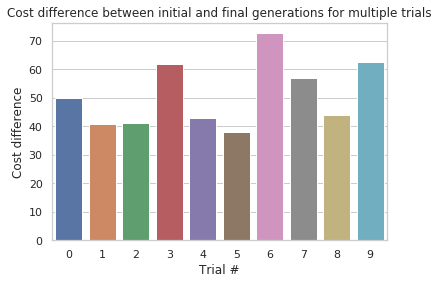

In [126]:
plot_difference(difference_list)

In [127]:
difference_list

[50.02167316861724,
 41.00227790432801,
 41.01985559566786,
 61.76203451407808,
 42.82407407407407,
 38.071525577184225,
 72.7029438001784,
 57.036692986530426,
 44.012797074954285,
 62.72563176895305]

### Using two-point crossover method:


In [0]:
population_size = 50
num_generations = 100
num_parents = 20
num_children = 50
dim = 50
num_of_iterations = 10

Cost of hardest maze at iteration 0: 198.24
Cost of hardest maze at iteration 1: 224.64000000000001
Cost of hardest maze at iteration 2: 222.56000000000003
Cost of hardest maze at iteration 3: 237.40000000000003
Cost of hardest maze at iteration 4: 246.24
Cost of hardest maze at iteration 5: 209.32000000000002
Cost of hardest maze at iteration 6: 217.56
Cost of hardest maze at iteration 7: 209.52
Cost of hardest maze at iteration 8: 217.76
Cost of hardest maze at iteration 9: 236.36
Cost of final hardest maze is : 246.24
Cost of Hardest Maze: 246.24


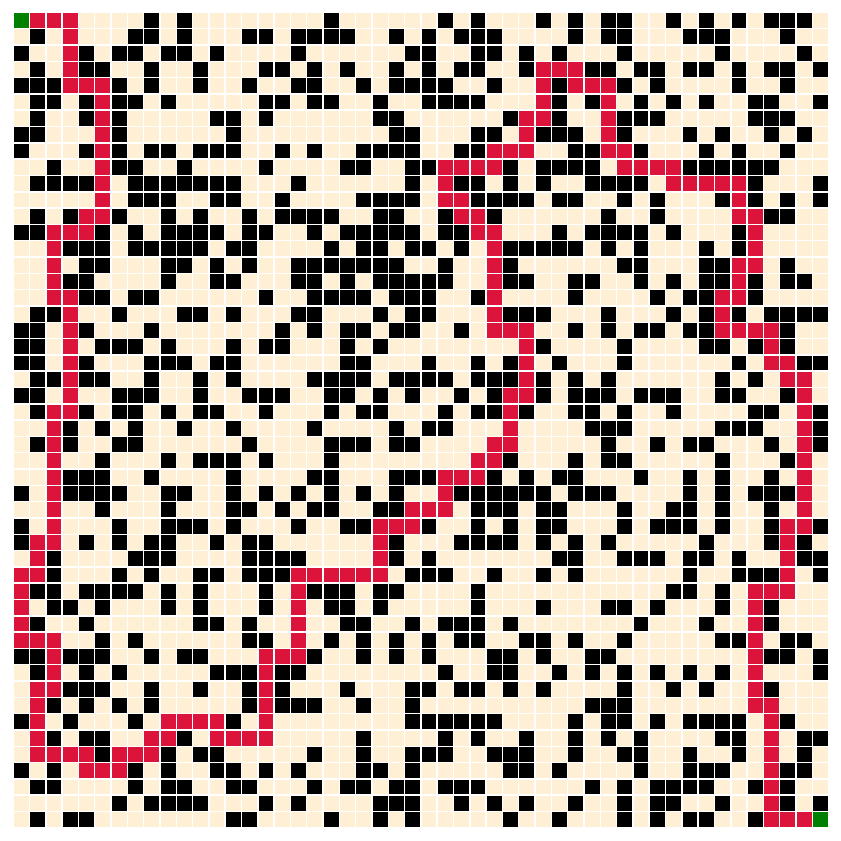

221

In [136]:
hardest_maze_two_point, difference_list_two_point = multiple_ga(dim, num_of_iterations, num_generations, num_parents, num_children, "two_point_crossover")
is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(hardest_maze_two_point[0], start, goal, "manhattan")
maze_temp = hardest_maze_two_point[0]*100
display_path(maze_temp, prev_list, start, goal)

[50.02167316861724, 41.00227790432801, 41.01985559566786, 61.76203451407808, 42.82407407407407, 38.071525577184225, 72.7029438001784, 57.036692986530426, 44.012797074954285, 62.72563176895305]


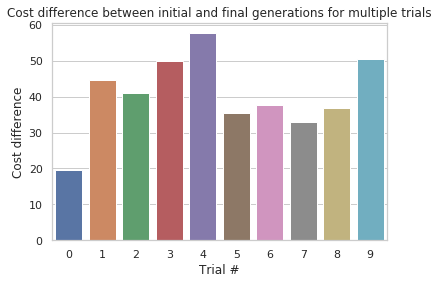

In [137]:
print(difference_list)
plot_difference(difference_list_two_point)

### Using uniform crossover method:

Cost of hardest maze at iteration 0: 210.60000000000002
Cost of hardest maze at iteration 1: 220.32000000000002
Cost of hardest maze at iteration 2: 213.36
Cost of hardest maze at iteration 3: 257.20000000000005
Cost of hardest maze at iteration 4: 201.52000000000004
Cost of hardest maze at iteration 5: 220.08
Cost of hardest maze at iteration 6: 214.0
Cost of hardest maze at iteration 7: 186.96000000000004
Cost of hardest maze at iteration 8: 254.48000000000002
Cost of hardest maze at iteration 9: 220.48000000000002
Cost of final hardest maze is : 257.20000000000005
Cost of Hardest Maze: 257.20000000000005


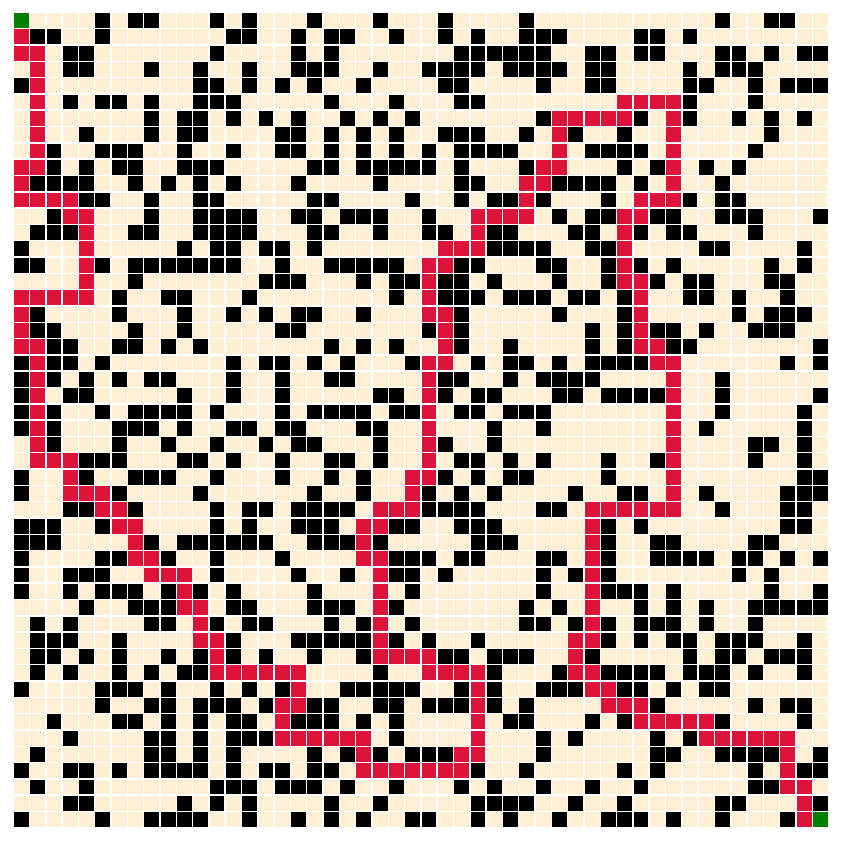

227

In [147]:
hardest_maze_uniform, difference_list_uniform = multiple_ga(dim, num_of_iterations, num_generations, num_parents, num_children, "uniform_crossover")
is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(hardest_maze_uniform[0], start, goal, "manhattan")
maze_temp = hardest_maze_uniform[0]*100
display_path(maze_temp, prev_list, start, goal)

[50.02167316861724, 41.00227790432801, 41.01985559566786, 61.76203451407808, 42.82407407407407, 38.071525577184225, 72.7029438001784, 57.036692986530426, 44.012797074954285, 62.72563176895305]


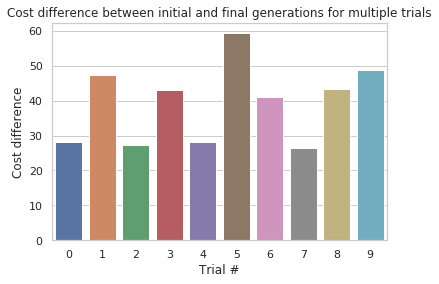

In [142]:
print(difference_list_uniform)
plot_difference(difference_list_uniform)

### Using single point crossover method:

Cost of hardest maze at iteration 0: 231.76000000000002
Cost of hardest maze at iteration 1: 243.88000000000002
Cost of hardest maze at iteration 2: 228.12
Cost of hardest maze at iteration 3: 238.44000000000003
Cost of hardest maze at iteration 4: 212.8
Cost of hardest maze at iteration 5: 219.28000000000003
Cost of hardest maze at iteration 6: 195.04000000000002
Cost of hardest maze at iteration 7: 214.68
Cost of hardest maze at iteration 8: 214.32000000000002
Cost of hardest maze at iteration 9: 241.72000000000003
Cost of final hardest maze is : 243.88000000000002
Cost of Hardest Maze: 243.88000000000002


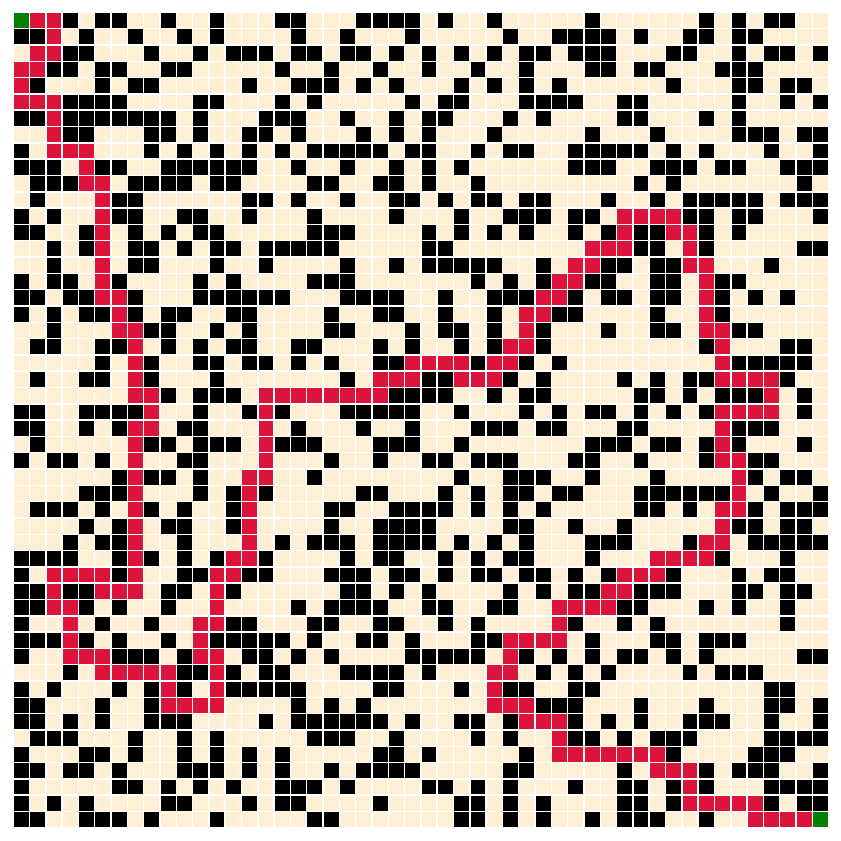

217

In [145]:
hardest_maze_single_point, difference_list_single_point = multiple_ga(dim, num_of_iterations, num_generations, num_parents, num_children, "single_point_crossover")
is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(hardest_maze_single_point[0], start, goal, "manhattan")
maze_temp = hardest_maze_single_point[0]*100
display_path(maze_temp, prev_list, start, goal)

[46.535154274152774, 56.9773429454171, 47.09827185968531, 53.19969159599075, 36.97219361483007, 36.470002489419976, 25.314829092778208, 35.49608684675587, 35.98984771573603, 53.103623004813805]


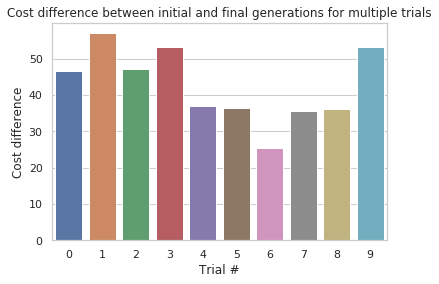

In [146]:
print(difference_list_single_point)
plot_difference(difference_list_single_point)